In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
data = pd.read_csv('marketing.csv', sep="\t")

In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Descrição das Colunas

- **ID**: Identificador único do cliente
- **Year_Birth**: Ano de nascimento do cliente
- **Education**: Nível de educação do cliente
- **Marital_Status**: Estado civil do cliente
- **Income**: Renda anual do domicílio do cliente
- **Kidhome**: Número de crianças na casa do cliente
- **Teenhome**: Número de adolescentes na casa do cliente
- **Dt_Customer**: Data de inscrição do cliente na empresa
- **Recency**: Número de dias desde a última compra do cliente
- **Complain**: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário


# Descrição das Colunas de Gastos

- **MntWines**: Valor gasto em vinho nos últimos 2 anos
- **MntFruits**: Valor gasto em frutas nos últimos 2 anos
- **MntMeatProducts**: Valor gasto em produtos de carne nos últimos 2 anos
- **MntFishProducts**: Valor gasto em produtos de peixe nos últimos 2 anos
- **MntSweetProducts**: Valor gasto em doces nos últimos 2 anos
- **MntGoldProds**: Valor gasto em produtos de ouro nos últimos 2 anos

# Descrição das Colunas de Promoção

- **Promotion**: Informações sobre a promoção
- **NumDealsPurchases**: Número de compras realizadas com desconto
- **AcceptedCmp1**: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
- **AcceptedCmp2**: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
- **AcceptedCmp3**: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
- **AcceptedCmp4**: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
- **AcceptedCmp5**: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
- **Response**: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

# Descrição das Colunas de Compras

- **NumWebPurchases**: Número de compras realizadas através do site da empresa
- **NumCatalogPurchases**: Número de compras realizadas usando um catálogo
- **NumStorePurchases**: Número de compras feitas diretamente nas lojas
- **NumWebVisitsMonth**: Número de visitas ao site da empresa no último mês


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data = data.dropna()

In [7]:
print('Quantidade de registros apos drop', len(data))

Quantidade de registros apos drop 2216


In [8]:
data["Dt_Customer"] = pd.to_datetime(data['Dt_Customer'],format="%d-%m-%Y")
dates = []
for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)


In [9]:
print("Data de inscricao mais recente", max(dates))
print("Data de inscricao mais antiga", min(dates))

Data de inscricao mais recente 2014-06-29
Data de inscricao mais antiga 2012-07-30


In [10]:
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [11]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,57283200000000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,9763200000000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,26956800000000000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,12009600000000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,13910400000000000


In [12]:
print("TOtal de CAtegorias em estado civil: ", data['Marital_Status'].value_counts(),"\n" )
print("TOtal de CAtegorias em educação: ", data['Education'].value_counts(),"\n" )


TOtal de CAtegorias em estado civil:  Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

TOtal de CAtegorias em educação:  Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64 



In [13]:
data["Age"] = 2024 - data["Year_Birth"]

In [14]:
data["Spent"] =  data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"]+ data["MntFishProducts"] + data["MntSweetProducts"] +data["MntGoldProds"]

In [15]:
data['Living_With'] = data['Marital_Status'].replace( {"Married":"Partner","Together":"Partner","Single": "Alone","Divorced": "Alone","Widow": "Alone" ,"Alone": "Alone","Absurd": "Alone","YOLO": "Alone"})




In [16]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,57283200000000000,67,1617,Alone
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,9763200000000000,70,27,Alone
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,26956800000000000,59,776,Partner
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,12009600000000000,40,53,Partner
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,13910400000000000,43,422,Partner


In [17]:
data["Children"] = data["Kidhome"] + data["Teenhome"]

In [18]:
data["Family_Size"] = data["Living_With"].replace({"Alone":1,"Partner":2}) + data["Children"]

In [19]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,57283200000000000,67,1617,Alone,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,9763200000000000,70,27,Alone,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,26956800000000000,59,776,Partner,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,12009600000000000,40,53,Partner,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,13910400000000000,43,422,Partner,1,3


In [20]:
data["Is_Parent"] = np.where(data.Children > 0,1,0)

In [21]:
data["Eduacation"]= data["Education"].replace({"Graduation": "Graduate","PhD": "Postgraduate","Master": "Postgraduate","2n Cycle":"Undergraduate","Basic": "Undergraduate"})

In [22]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Eduacation
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,11,1,57283200000000000,67,1617,Alone,0,1,0,Graduate
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,11,0,9763200000000000,70,27,Alone,2,3,1,Graduate
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,26956800000000000,59,776,Partner,0,2,0,Graduate
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,11,0,12009600000000000,40,53,Partner,1,3,1,Graduate
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,13910400000000000,43,422,Partner,1,3,1,Postgraduate


In [23]:
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


In [24]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]


In [25]:
data = data.drop(to_drop, axis=1)

In [26]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Eduacation
0,Graduation,58138.0,0,0,58,635,88,546,172,88,...,0,1,57283200000000000,67,1617,Alone,0,1,0,Graduate
1,Graduation,46344.0,1,1,38,11,1,6,2,1,...,0,0,9763200000000000,70,27,Alone,2,3,1,Graduate
2,Graduation,71613.0,0,0,26,426,49,127,111,21,...,0,0,26956800000000000,59,776,Partner,0,2,0,Graduate
3,Graduation,26646.0,1,0,26,11,4,20,10,3,...,0,0,12009600000000000,40,53,Partner,1,3,1,Graduate
4,PhD,58293.0,1,0,94,173,43,118,46,27,...,0,0,13910400000000000,43,422,Partner,1,3,1,Postgraduate


In [27]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,131.000000,2525.000000,3.000000,5.000000,1.000000


In [28]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

<Figure size 800x550 with 0 Axes>

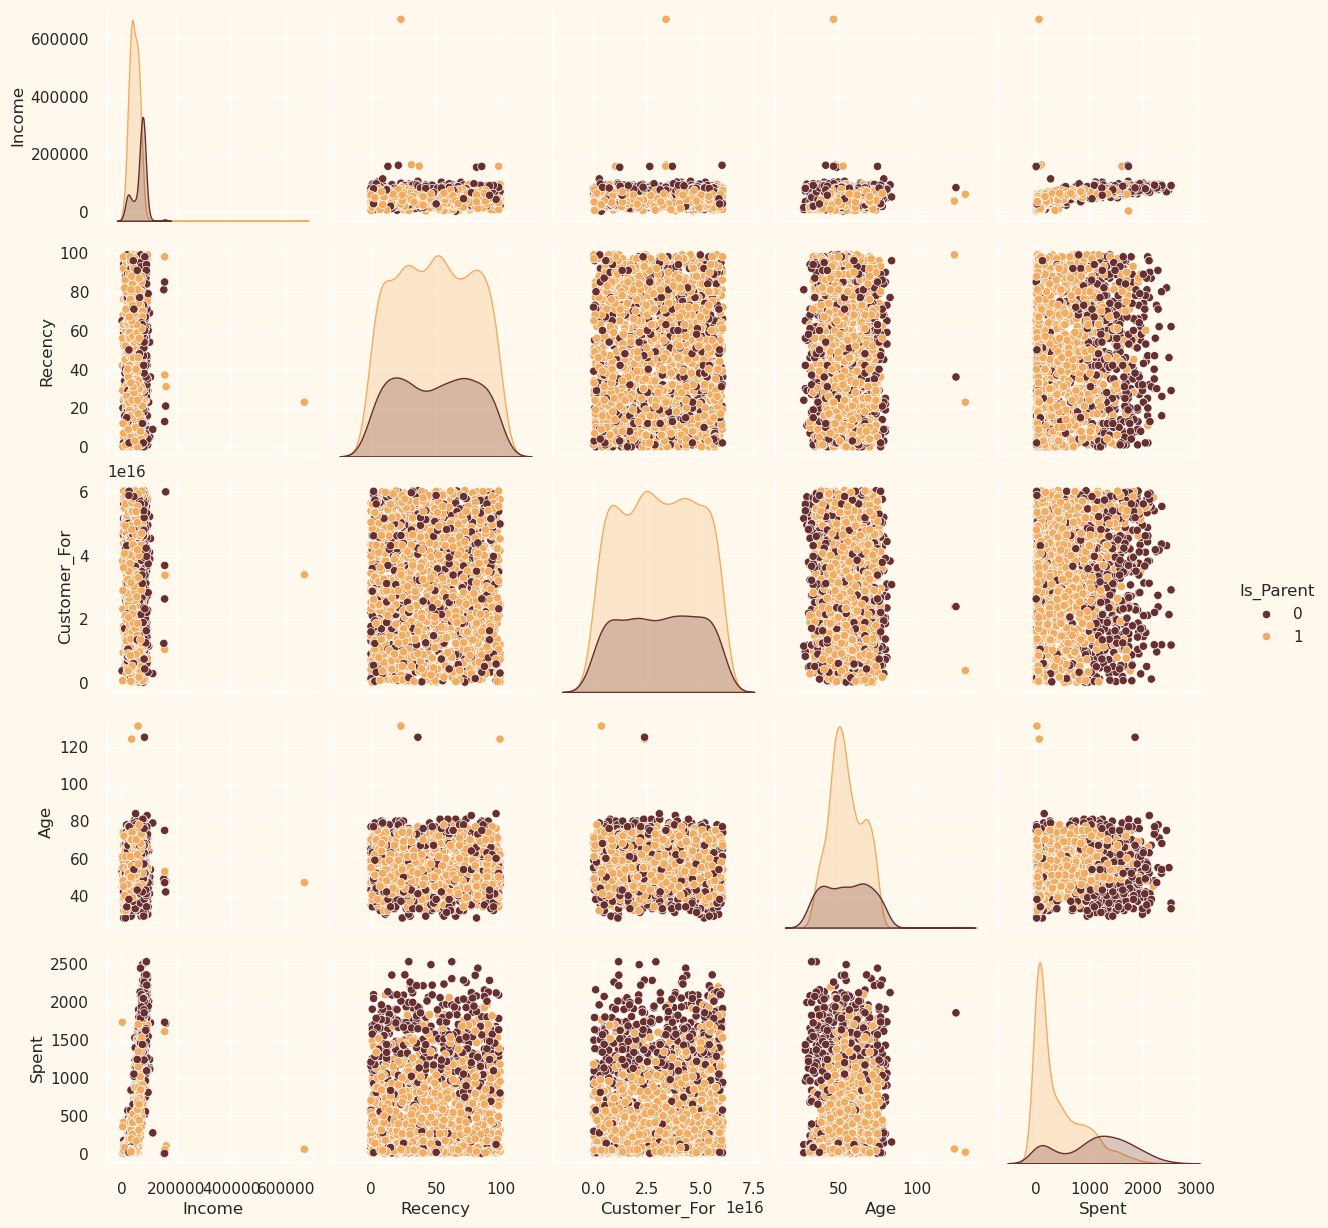

In [29]:
To_Plot = ["Income", "Recency", "Customer_For","Age","Spent","Is_Parent"]
plt.figure()
sns.pairplot(data[To_Plot],hue="Is_Parent", palette= (["#682F2F","#F3AB60"]))
plt.show()

In [30]:
data = data[(data["Age"])<90]
data = data[(data["Income"]< 600000)]

In [31]:
s = (data.dtypes == "object")
object_cols = list(s[s].index)

In [32]:
LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)
    

In [33]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Eduacation
0,2,58138.0,0,0,58,635,88,546,172,88,...,0,1,57283200000000000,67,1617,0,0,1,0,0
1,2,46344.0,1,1,38,11,1,6,2,1,...,0,0,9763200000000000,70,27,0,2,3,1,0
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,26956800000000000,59,776,1,0,2,0,0
3,2,26646.0,1,0,26,11,4,20,10,3,...,0,0,12009600000000000,40,53,1,1,3,1,0
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,0,13910400000000000,43,422,1,1,3,1,1


In [34]:
ds = data.copy()

In [35]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

In [36]:
ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Eduacation
0,2,58138.0,0,0,58,635,88,546,172,88,...,4,7,57283200000000000,67,1617,0,0,1,0,0
1,2,46344.0,1,1,38,11,1,6,2,1,...,2,5,9763200000000000,70,27,0,2,3,1,0
2,2,71613.0,0,0,26,426,49,127,111,21,...,10,4,26956800000000000,59,776,1,0,2,0,0
3,2,26646.0,1,0,26,11,4,20,10,3,...,4,6,12009600000000000,40,53,1,1,3,1,0
4,4,58293.0,1,0,94,173,43,118,46,27,...,6,5,13910400000000000,43,422,1,1,3,1,1


In [37]:
scaler = StandardScaler()
scaler.fit(ds)
scaler_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)

In [38]:
scaler_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Eduacation
0,-0.352543,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139,-0.893586
1,-0.352543,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456,-0.893586
2,-0.352543,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139,-0.893586
3,-0.352543,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456,-0.893586
4,1.429916,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456,0.571657


In [39]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

# Análise de Distribuição dos Dados

- Se o valor estiver entre {0.01, ..., 0.3}, os dados estão espaçados regularmente.

- Se o valor estiver em torno de 0.5, os dados são aleatórios.

- Se o valor estiver entre {0.7, ..., 0.99}, há uma alta tendência de agrupamento.


In [40]:
hopkins_score = round(hopkins(ds),2)

In [41]:
print("Valor de Hopkins = {}".format(hopkins_score))

Valor de Hopkins = 0.89


In [42]:
pca = PCA(n_components=3)
pca.fit(scaler_ds)
PCA_ds= pd.DataFrame(pca.transform(scaler_ds),columns= (["col1", "col2","col3"]))


In [43]:
PCA_ds.head()

,col1,col2,col3
0,4.982160,-0.242346,2.286678
1,-2.876717,0.021964,-1.601424
2,2.612139,-0.764767,-0.200933
3,-2.658573,-1.492987,0.000858
4,-0.642682,0.330221,-0.137513


In [44]:
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

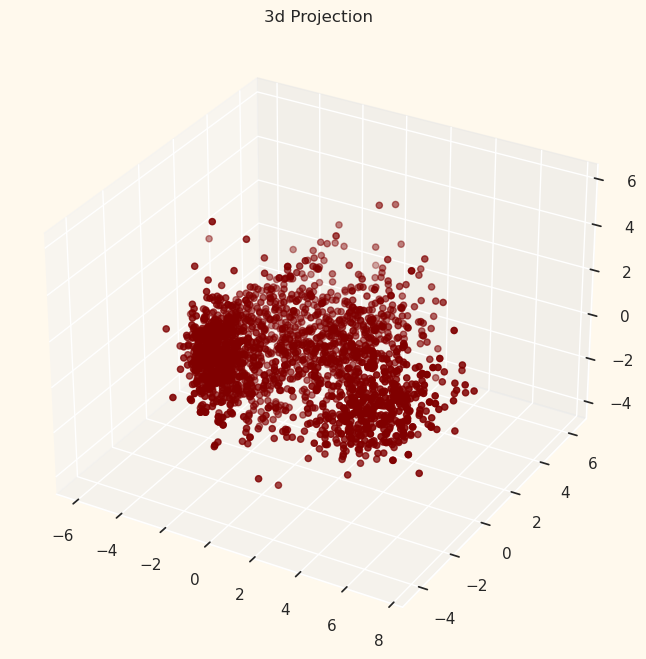

In [45]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c="maroon", marker="o")
plt.title("3d Projection")
plt.show()

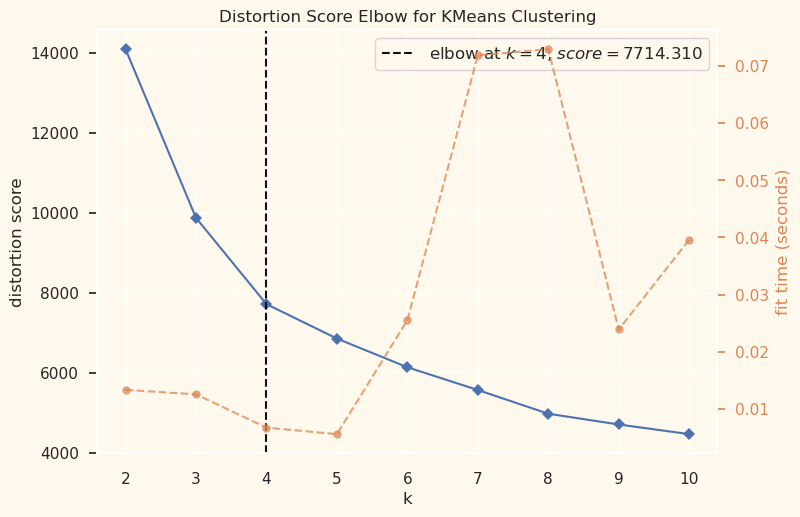

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
Elbow_M = KElbowVisualizer(KMeans(),k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

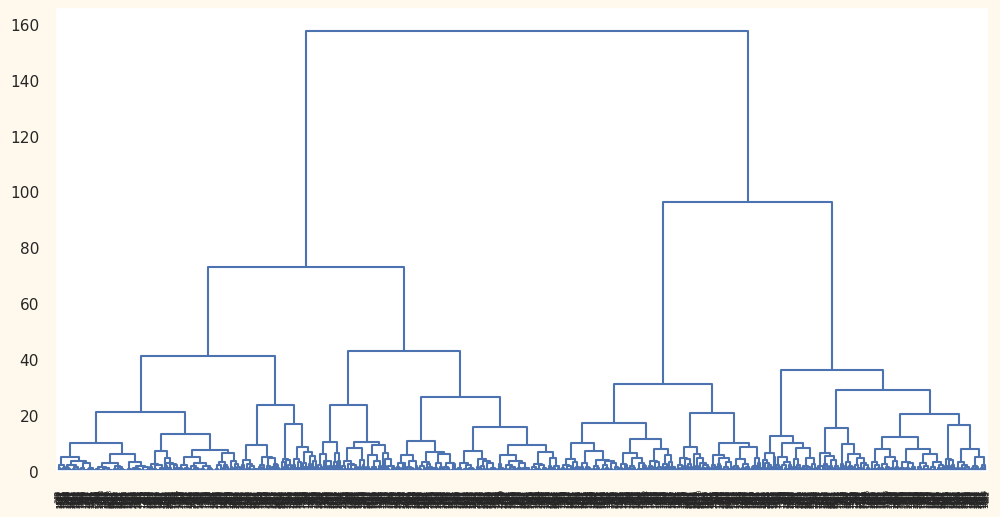

In [47]:
Z = linkage(PCA_ds, method='ward')
plt.figure(figsize=(12,6))
dendrogram(Z,color_threshold=0.2, show_leaf_counts=True)
plt.show()

In [48]:
clustering = AgglomerativeClustering(n_clusters=4, linkage="ward")
y_pred = clustering.fit_predict(PCA_ds)

In [49]:
PCA_ds["Clusters"] = y_pred

In [50]:
data["Clusters"] = y_pred

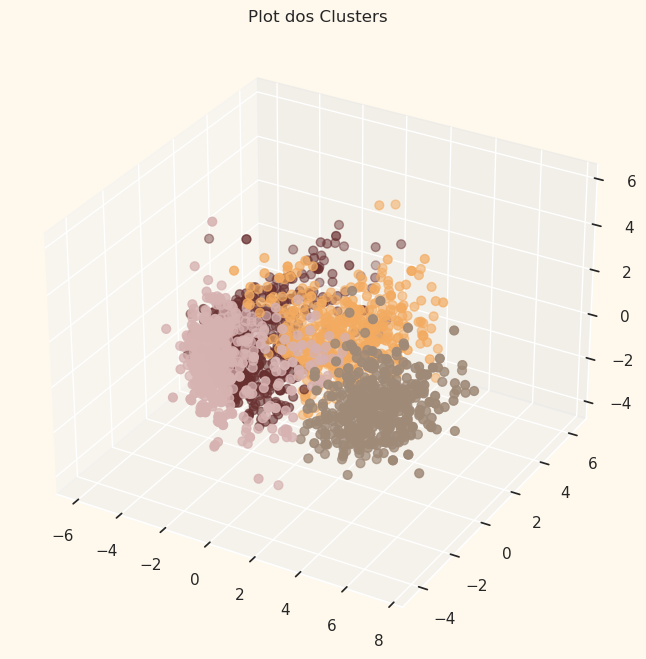

In [51]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111,projection='3d')
ax.scatter(x,y,z,s=40,c=PCA_ds["Clusters"], marker="o", cmap=cmap)
ax.set_title("Plot dos Clusters")
plt.show()

In [52]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]


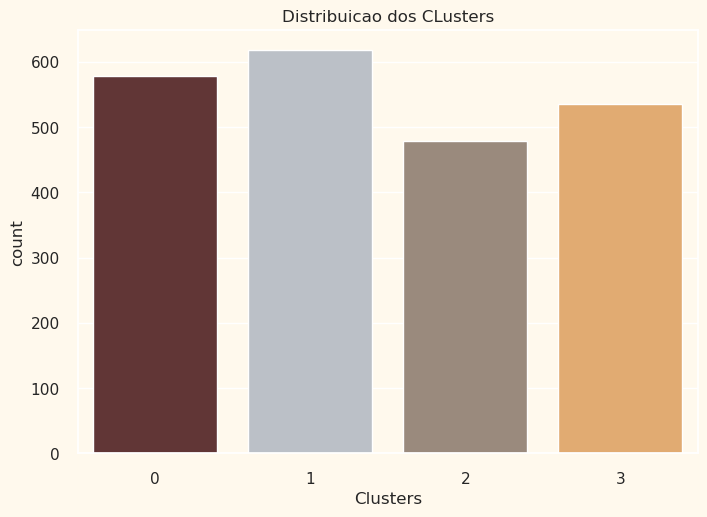

In [53]:
pl = sns.countplot(x=data['Clusters'], palette=pal)
pl.set_title("Distribuicao dos CLusters")
plt.show()

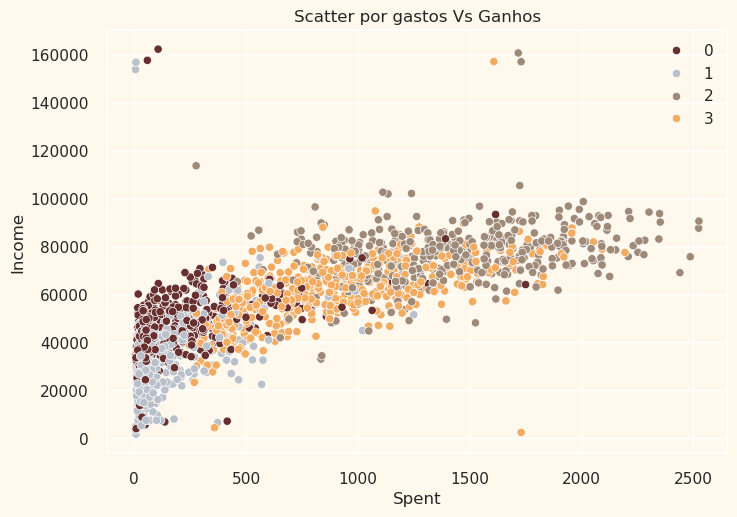

In [54]:
pl = sns.scatterplot(data = data, x=data['Spent'], y=data['Income'], hue=data['Clusters'],palette=pal)
pl.set_title("Scatter por gastos Vs Ganhos")
plt.legend()
plt.show()

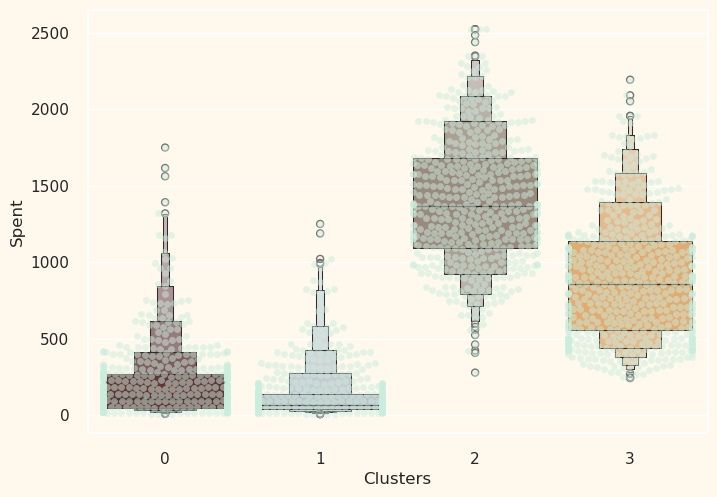

In [55]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

In [56]:
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]


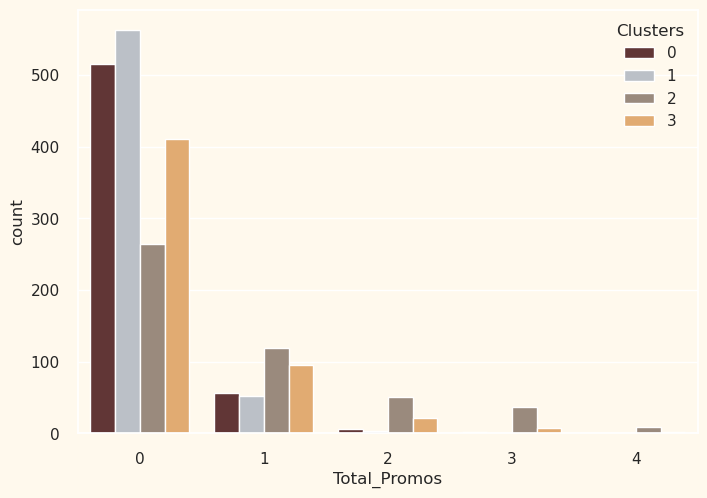

In [59]:
plt.figure()
pl =  sns.countplot(x=data["Total_Promos"], hue=data["Clusters"],palette= pal)
plt.show()

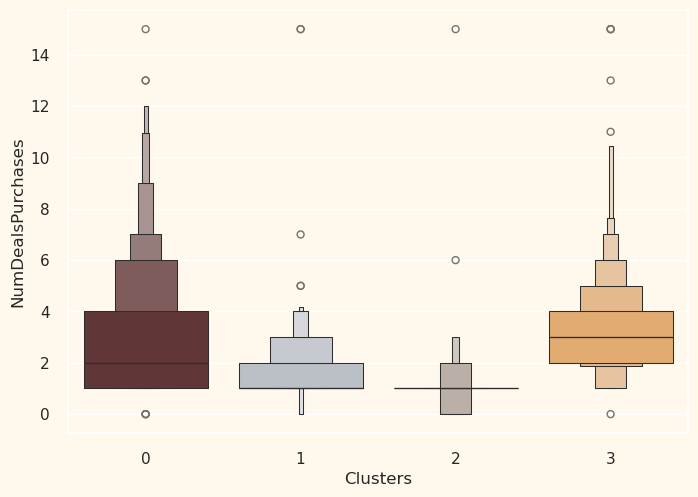

In [60]:
plt.figure()
pl = sns.boxenplot(y=data["NumDealsPurchases"], x=data["Clusters"], palette=pal)
plt.show()

<Figure size 800x550 with 0 Axes>

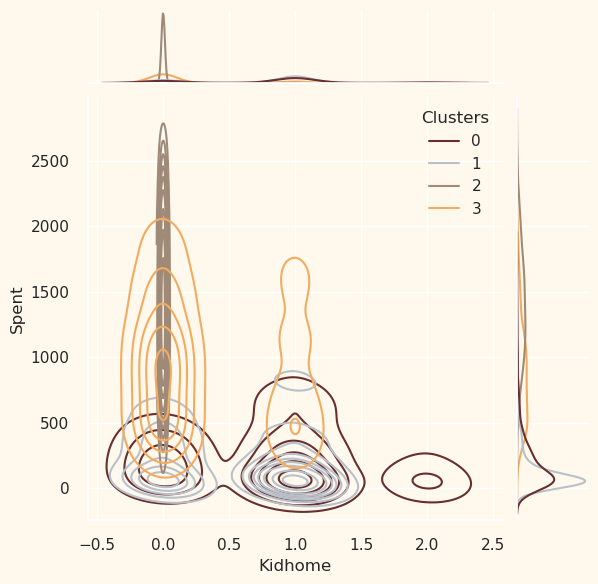

<Figure size 800x550 with 0 Axes>

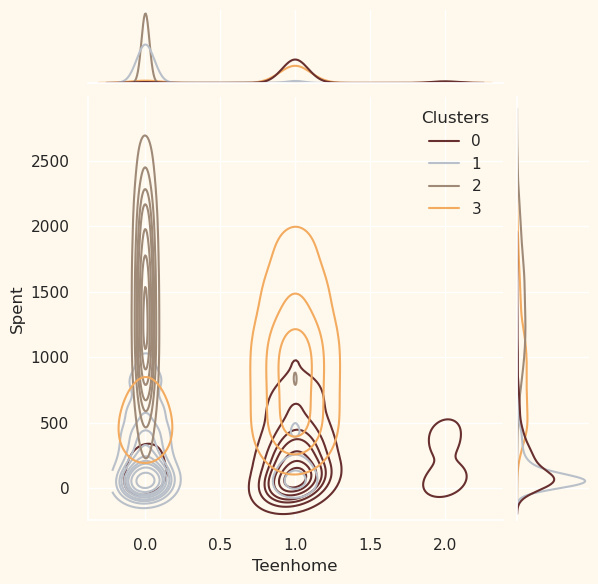

<Figure size 800x550 with 0 Axes>

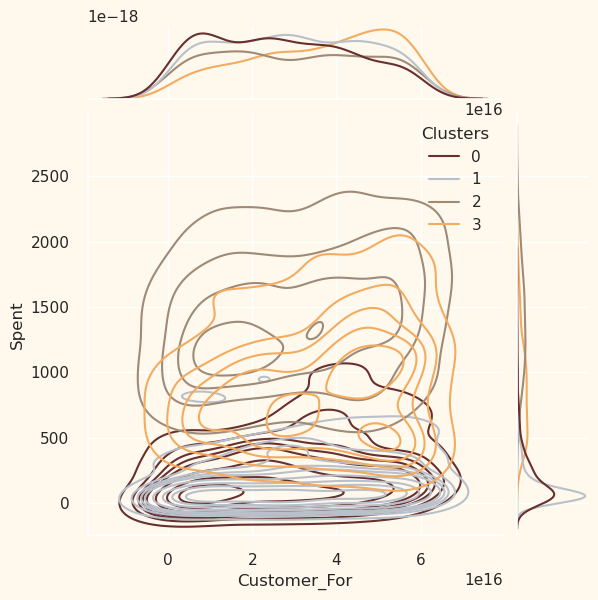

<Figure size 800x550 with 0 Axes>

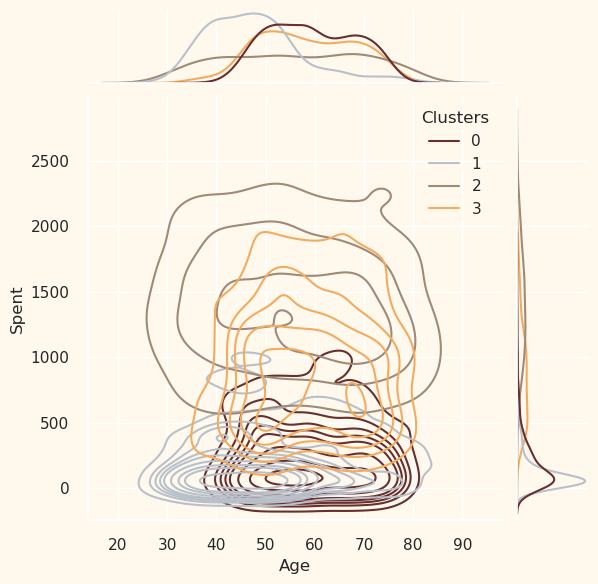

<Figure size 800x550 with 0 Axes>

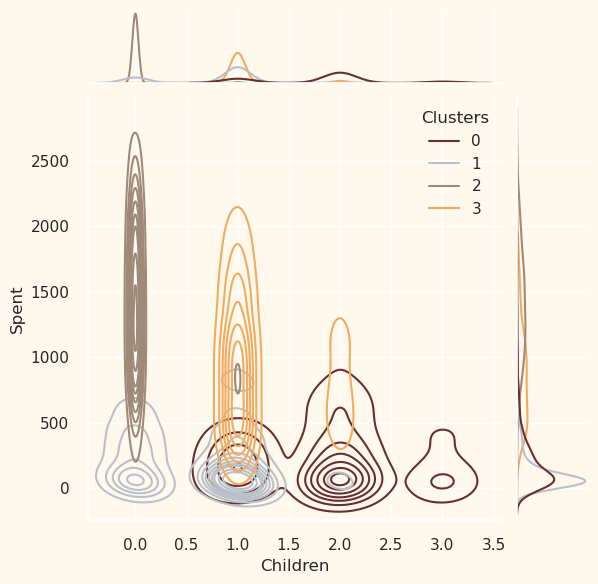

<Figure size 800x550 with 0 Axes>

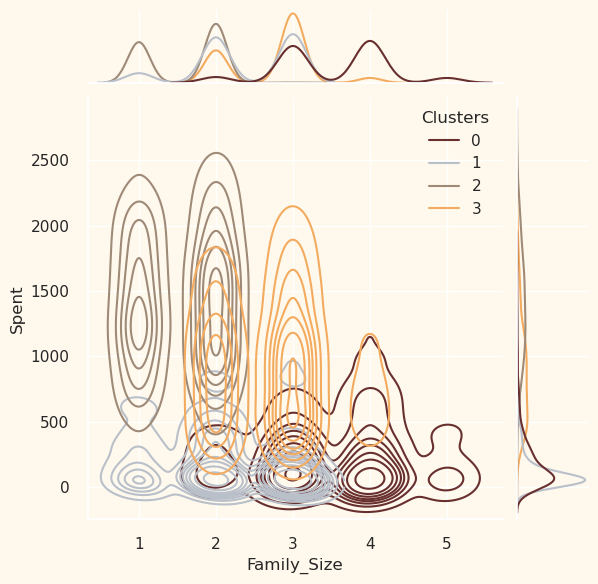

<Figure size 800x550 with 0 Axes>

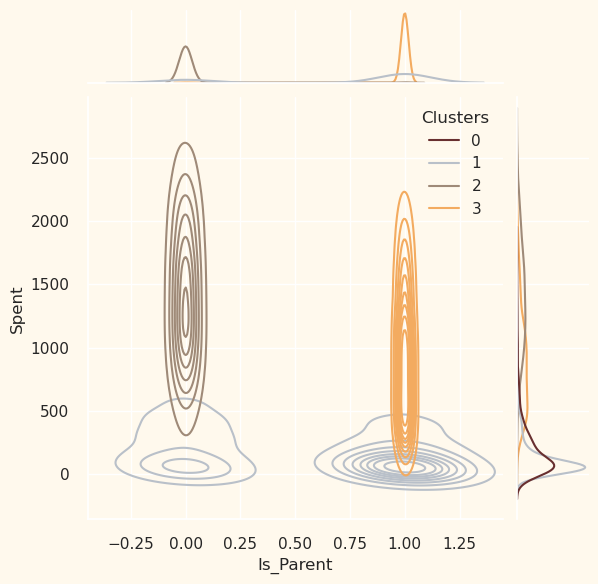

<Figure size 800x550 with 0 Axes>

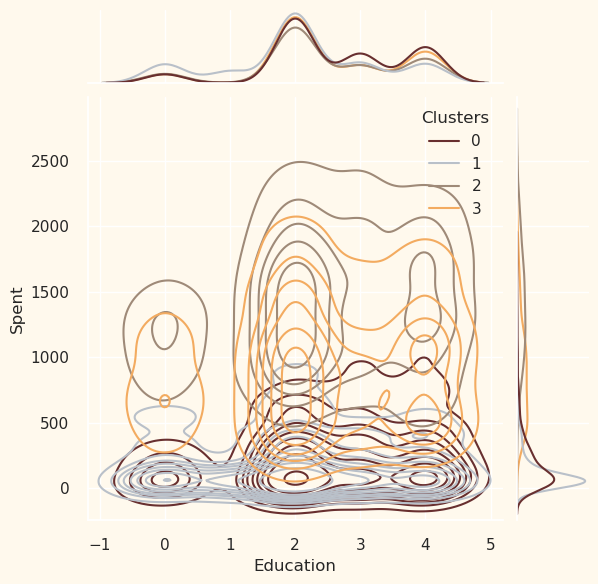

<Figure size 800x550 with 0 Axes>

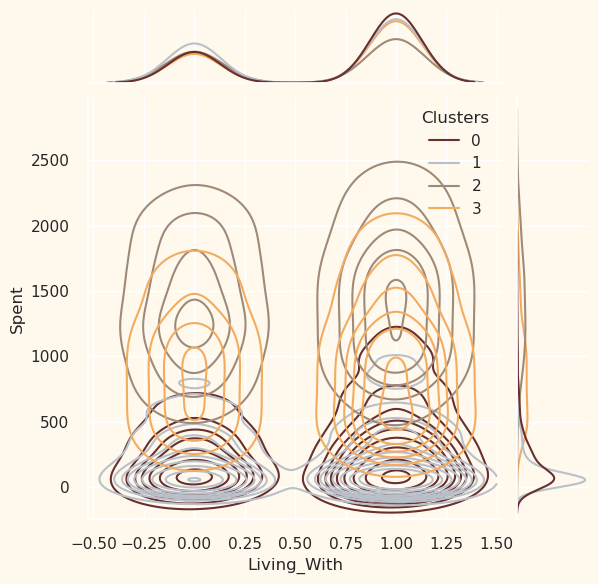

In [62]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]
for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i],y=data['Spent'], hue=data["Clusters"], kind="kde", palette=pal)
    plt.show()